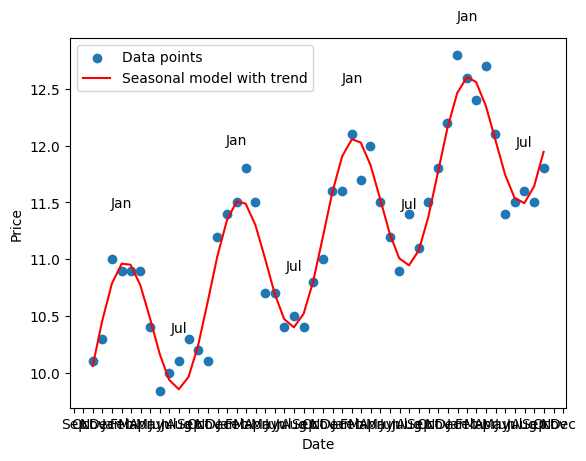

10.468499441533737


In [12]:
import csv
from scipy import optimize
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import matplotlib.dates as mdates
from scipy.signal import argrelextrema

def main():
    # File path
    path = r'/workspaces/JPQuantForage/gas.csv'

    # Initialize lists
    dates = []
    prices = []

    # Read CSV file
    with open(path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            dates.append(datetime.strptime(row[0], "%m/%d/%y"))  # Keep dates as datetime objects
            prices.append(float(row[1]))  # Convert prices to float

    # Convert datetime objects to numeric format for fitting
    numeric_dates = mdates.date2num(dates)

    # Define the sinusoidal function with a linear trend
    def seasonal_model_with_trend(x, a, b, c, d, e):
        return a * np.sin(b * x + c) + d * x + e

    # Fit the sinusoidal model with a linear trend to the data
    params, params_covariance = optimize.curve_fit(seasonal_model_with_trend, numeric_dates, prices, p0=[1, 2*np.pi/(365.25), 0, 0, np.mean(prices)])

    # Plot data points and the fitted model
    plt.scatter(dates, prices, label="Data points")
    plt.plot(dates, seasonal_model_with_trend(numeric_dates, *params), color='red', label="Seasonal model with trend")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()

    # Format x-axis to show months
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    # Find local maxima and minima
    fitted_prices = seasonal_model_with_trend(numeric_dates, *params)
    maxima_indices = argrelextrema(fitted_prices, np.greater)[0]
    minima_indices = argrelextrema(fitted_prices, np.less)[0]
    extrema_indices = np.sort(np.concatenate((maxima_indices, minima_indices)))

    # Label the local maxima and minima
    for idx in extrema_indices:
        date = dates[idx]
        price = fitted_prices[idx]
        plt.annotate(f'{date.strftime("%b")}', xy=(date, price), xytext=(date, price + 0.5), ha='center')

    # Show plot
    plt.show()

    # Example input date prediction
    input_date = "07/01/2022"
    input_datetime = datetime.strptime(input_date, "%m/%d/%Y")
    input_numeric_date = mdates.date2num(input_datetime)
    predicted_price = seasonal_model_with_trend(input_numeric_date, *params)
    print(predicted_price)

if __name__ == '__main__':
    main()

In [2]:
#Task 4 Answer

import pandas as pd
from math import log

df = pd.read_csv('Task 3 and 4 Loan Data.csv')
 
x = df['default'].to_list()
y = df['fico_score'].to_list()
n = len(x)
print (len(x), len(y))
 
default = [0 for i in range(851)]
total = [0 for i in range(851)]
 
for i in range(n):
   y[i] = int(y[i])
   default[y[i]-300] += x[i]
   total[y[i]-300] += 1
   
for i in range(0, 551):
   default[i] += default[i-1]
   total[i] += total[i-1]
   
import numpy as np
   
def log_likelihood(n, k):
   p = k/n
   if (p==0 or p==1):
       return 0
   return k*np.log(p)+ (n-k)*np.log(1-p)
 
r = 10
dp = [[[-10**18, 0] for i in range(551)] for j in range(r+1)]
 
for i in range(r+1):
   for j in range(551):
       if (i==0):
           dp[i][j][0] = 0
       else:
           for k in range(j):
               if (total[j]==total[k]):
                   continue
               if (i==1):
                   dp[i][j][0] = log_likelihood(total[j], default[j])
               else:
                   if (dp[i][j][0] < (dp[i-1][k][0] + log_likelihood(total[j]-total[k], default[j] - default[k]))):
                       dp[i][j][0] = log_likelihood(total[j]-total[k], default[j]-default[k]) + dp[i-1][k][0]
                       dp[i][j][1] = k
                                                   
print (round(dp[r][550][0], 4))
                                                   
k = 550
l = []
while r >= 0:
   l.append(k+300)
   k = dp[r][k][1]
   r -= 1
 
print(l)

10000 10000
-4217.8245
[850, 753, 752, 732, 696, 649, 611, 580, 552, 520, 300]
